### Using Google's Colaboratory Notebooks
The webpage you are looking at is an example of a Colab notebook. Notebooks are a convenient way to write and execute Python code. Google's Colab notebooks provide the extra benefit of installing packages and running code on the cloud, rather than on your own CPU.

### First steps:
Navigate to "File" and select "Save a copy in Drive."
Navigate to "Edit", select "Notebook settings" and make sure that "Runtime type" is set to "Python 3."

### Creating code and text cells
Colab notebooks are divided into cells which can contain either text or Python code. Although I have created all the cells we will be using for this workshop, it may be helpful to learn how to add cells of your own.

If you hover your mouse at the top or bottom of an already existing cell, you will have an option of adding a new code or text cell. Additionally, you can select the three dots on the right side of a cell for more options.

### Running code cells
There are two ways to run code cells:

Click the "play" button on the left side of the code cell
Press SHIFT+RETURN (or SHIFT+ENTER)

In [1]:
!pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 11.3 MB/s eta 0:00:00


In [2]:
import os
import pandas as pd
import stanza

In [3]:
! git clone https://github.com/jdeen33/Gibbon_text.git

Cloning into 'Gibbon_text'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 74 (delta 0), reused 0 (delta 0), pack-reused 71
Receiving objects: 100% (74/74), 4.20 MiB | 13.32 MiB/s, done.


**Files in Google Colab**

Click this folder icon on the left to see your file directory
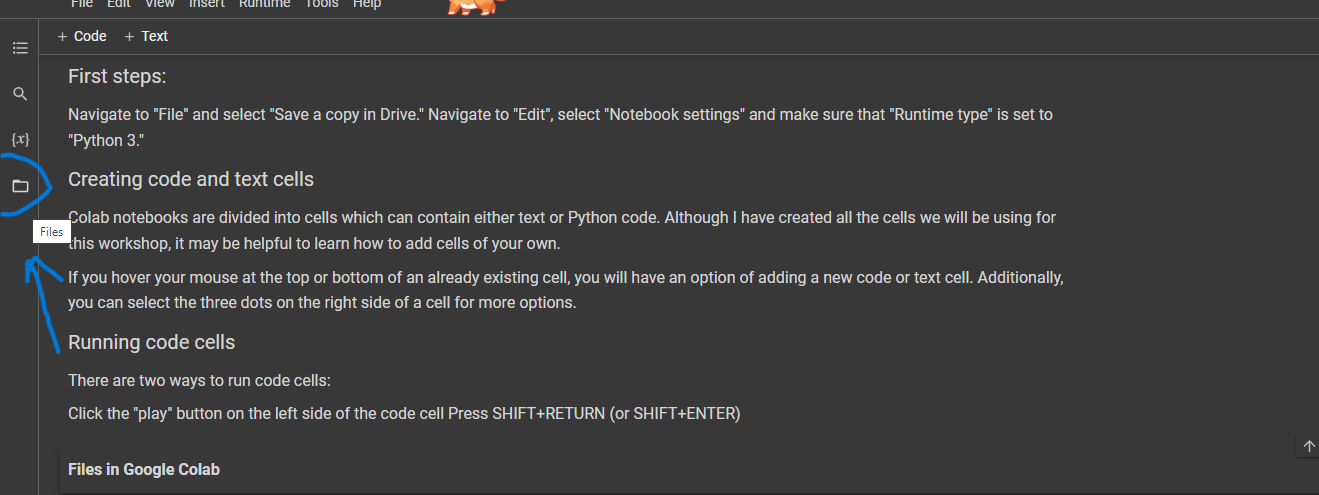


After we cloned my github repository (which contains text files of every chapter in Gibbon) We should now see this 'Gibbon_text' folder. Click on that tiny triangle to the left to 'open' the file and see what is inside



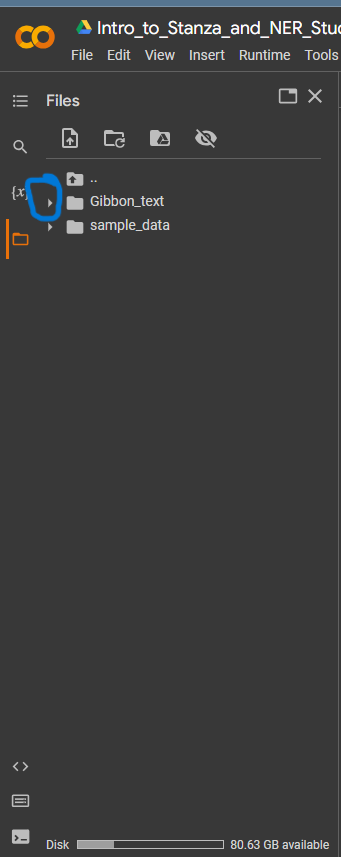

To get to access the filepath of a file in your directory, click on these three tiny dots all the way to the right that appear when you hover over the file with your mouse

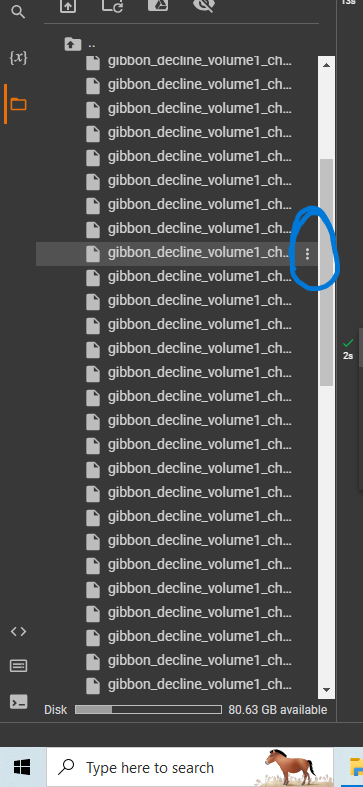

Then, select 'copy path' - this will be the path you paste into the
'mychapterfile=' variable in the next code block. Choose any chapter you are interested in exploring !


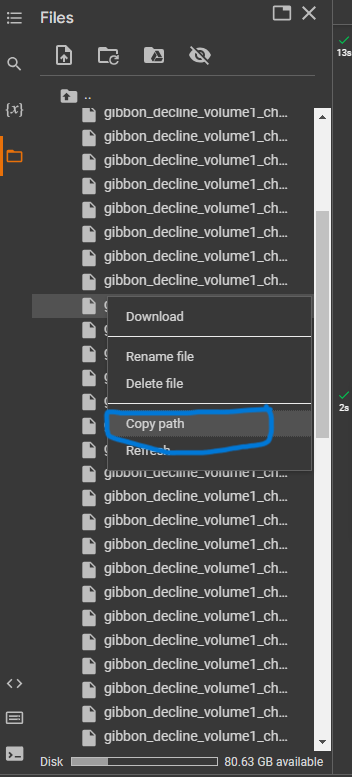

In [4]:

mychapterfile= '/content/Gibbon_text/gibbon_decline_volume1_chap15.txt'
with open(mychapterfile, encoding='utf-8', mode='r') as f:
       mychapter  = f.read()    #replace my chapter with name for variable

In [5]:
#sanity check
mychapter #also replace with whatever variable name you chose above ^^^

"The progress of the Christian religion, and the sentiments, manners, numbers, and condition of the primitive Christians Importance of the inquiry\n A CANDID but rational inquiry into the progress and\n establishment of Christianity may be considered as a very\n essential part of the history of the Roman empire. While\n that great body was invaded by open violence, or undermined\n by slow decay, a pure and humble religion gently insinuated\n itself into the minds of men, grew up in silence and\n obscurity, derived new vigour from opposition, and finally\n erected the triumphant banner of the Cross on the ruins of\n the Capitol. Nor was the influence of Christianity confined\n to the period or to the limits of the Roman empire. After a\n revolution of thirteen or fourteen centuries, that religion\n is still professed by the nations of Europe, the most\n distinguished portion of human kind in arts and learning as\n well as in arms. By the industry and zeal of the Europeans\n it has been 

In [6]:
#parsers
#loading out NER parser

nlp_ner= stanza.Pipeline(lang='en', processors='tokenize, ner',tokenize_pretokenized=True)


INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: en (English):
| Processor | Package          |
--------------------------------
| tokenize  | combined         |
| ner       | ontonotes_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [17]:
#if you want to pretokenize and split your text by sentence
tokenized_chapter= mychapter.split('. ')
tokenized_chapter
#replace my chapter with your actual variable

['The progress of the Christian religion, and the sentiments, manners, numbers, and condition of the primitive Christians Importance of the inquiry\n A CANDID but rational inquiry into the progress and\n establishment of Christianity may be considered as a very\n essential part of the history of the Roman empire',
 'While\n that great body was invaded by open violence, or undermined\n by slow decay, a pure and humble religion gently insinuated\n itself into the minds of men, grew up in silence and\n obscurity, derived new vigour from opposition, and finally\n erected the triumphant banner of the Cross on the ruins of\n the Capitol',
 'Nor was the influence of Christianity confined\n to the period or to the limits of the Roman empire',
 'After a\n revolution of thirteen or fourteen centuries, that religion\n is still professed by the nations of Europe, the most\n distinguished portion of human kind in arts and learning as\n well as in arms',
 'By the industry and zeal of the Europeans\n

In [8]:
#creating a stanza document
#can take 3-6 mins depending on ur computer setup
#if you have pre_tokenized the text
Docs = [stanza.Document([], text=d) for d in tokenized_chapter]
Out_Docs = nlp_ner(Docs)


In [19]:
#accessing named entities for pre tokenized out_docs
Chapter21_NER=[]
for doc in Out_Docs:
    Chapter21_NER.append(doc.ents)
Chapter21_NER



In [20]:
#create a dictionary (NER_Dict) where the key is the token text and the value is the named entity tag
NER_Dict= {}    #token.text will show the text of each word, #token.ner will show NER, will == 'O' if token is not a named entity
for doc in Out_Docs:
    for sent in doc.sentences:
        for token in sent.tokens:
            print(f'{token.text},{token.ner}')
            NER_Dict[token.text] = token.ner
NER_Dict


Streaming output truncated to the last 5000 lines.
folly,O
of,O
Paganism;,S-ORG
and,O
when,O
Tertullian,S-PERSON
or,O
Lactantius,S-PERSON
employ,O
their,O
labours,O
in,O
exposing,O
its,O
falsehood,O
and,O
extravagance,,O
they,O
are,O
obliged,O
to,O
transcribe,O
the,O
eloquence,O
of,O
Cicero,S-PERSON
or,O
the,O
wit,O
of,O
Lucian,S-PERSON
The,O
contagion,O
of,O
these,O
sceptical,O
writings,O
had,O
been,O
diffused,O
far,O
beyond,O
the,O
number,O
of,O
their,O
readers,O
The,O
fashion,O
of,O
incredulity,O
was,O
communicated,O
from,O
the,O
philosopher,O
to,O
the,O
man,O
of,O
pleasure,O
or,O
business,,O
from,O
the,O
noble,O
to,O
the,O
plebeian,,O
and,O
from,O
the,O
master,O
to,O
the,O
menial,O
slave,O
who,O
waited,O
at,O
his,O
table,,O
and,O
who,O
eagerly,O
listened,O
to,O
the,O
freedom,O
of,O
his,O
conversation.,O
On,O
public,O
occasions,O
the,O
philosophic,O
part,O
of,O
mankind,O
affected,O
to,O
treat,O
with,O
respect,O
and,O
decency,O
the,O
religious,O
institutions,O
of,O
their,O
country,,O

{'The': 'O',
 'progress': 'O',
 'of': 'O',
 'the': 'O',
 'Christian': 'S-NORP',
 'religion,': 'O',
 'and': 'O',
 'sentiments,': 'O',
 'manners,': 'O',
 'numbers,': 'O',
 'condition': 'O',
 'primitive': 'O',
 'Christians': 'S-NORP',
 'Importance': 'O',
 'inquiry': 'O',
 'A': 'O',
 'CANDID': 'S-ORG',
 'but': 'O',
 'rational': 'O',
 'into': 'O',
 'establishment': 'O',
 'Christianity': 'S-NORP',
 'may': 'O',
 'be': 'O',
 'considered': 'O',
 'as': 'O',
 'a': 'O',
 'very': 'O',
 'essential': 'O',
 'part': 'O',
 'history': 'O',
 'Roman': 'S-NORP',
 'empire': 'O',
 'While': 'O',
 'that': 'O',
 'great': 'O',
 'body': 'O',
 'was': 'O',
 'invaded': 'O',
 'by': 'O',
 'open': 'O',
 'violence,': 'O',
 'or': 'O',
 'undermined': 'O',
 'slow': 'O',
 'decay,': 'O',
 'pure': 'O',
 'humble': 'O',
 'religion': 'O',
 'gently': 'O',
 'insinuated': 'O',
 'itself': 'O',
 'minds': 'O',
 'men,': 'O',
 'grew': 'O',
 'up': 'O',
 'in': 'O',
 'silence': 'O',
 'obscurity,': 'O',
 'derived': 'O',
 'new': 'O',
 'vigour

In [21]:
ner_frame= pd.DataFrame.from_dict(NER_Dict, orient= 'index')  #creates a pandas dataframe from dictionary
ner_frame

,0
The,O
progress,O
of,O
the,O
Christian,S-NORP
...,...
pale,O
season,O
"Passion,",S-PERSON
(199),O


In [24]:
ner_frame_indexed= ner_frame.reset_index()

In [25]:
ner_frame_indexed.rename(columns={'index':'token', 0: 'NER_tag'})

,level_0,token,NER_tag
0,0,The,O
1,1,progress,O
2,2,of,O
3,3,the,O
4,4,Christian,S-NORP
...,...,...,...
5071,5071,pale,O
5072,5072,season,O
5073,5073,"Passion,",S-PERSON
5074,5074,(199),O
